In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import ops_plotall, ops_plotsubset, ops_plot_acp_inits, ops_plot_timing_inits, ops_plot_timing_inits_L2, get_prc, plot_pcr
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'
fs_=8
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc('xtick', labelsize=fs_) 
matplotlib.rc('ytick', labelsize=fs_) 
plt.rc('legend',fontsize=fs_)

In [3]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 2.5
wc.params["inh_ext"] = zero_input

wc.run()
peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
p_list = []
for i in range(3,len(peaks)):
    p_list.append(peaks[i]- peaks[i-1])
period = np.mean(p_list)*dt

savepath = ('..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images_ops' + os.sep + 'sc0' + os.sep + '2-5_0' + os.sep)

savepath_subset = ( '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                        'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep + 'sc0' + os.sep + '2-5_0' + os.sep)

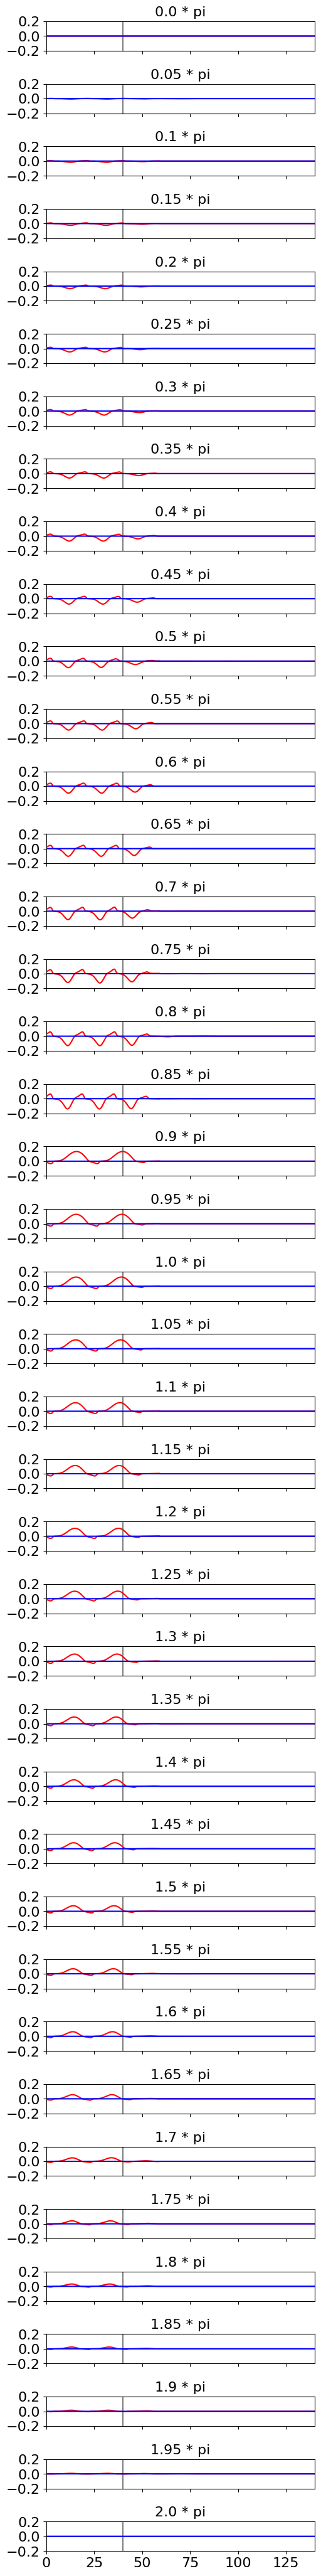

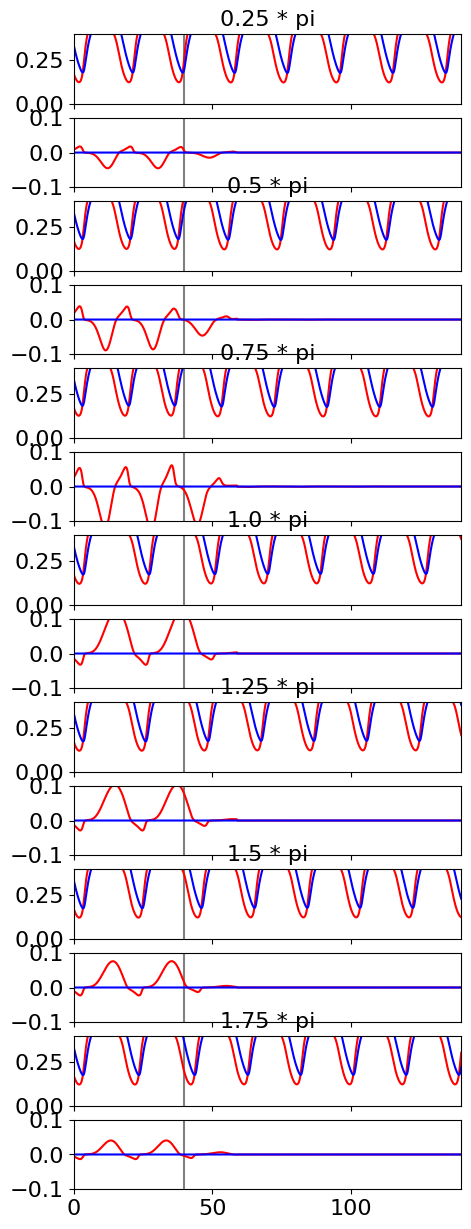

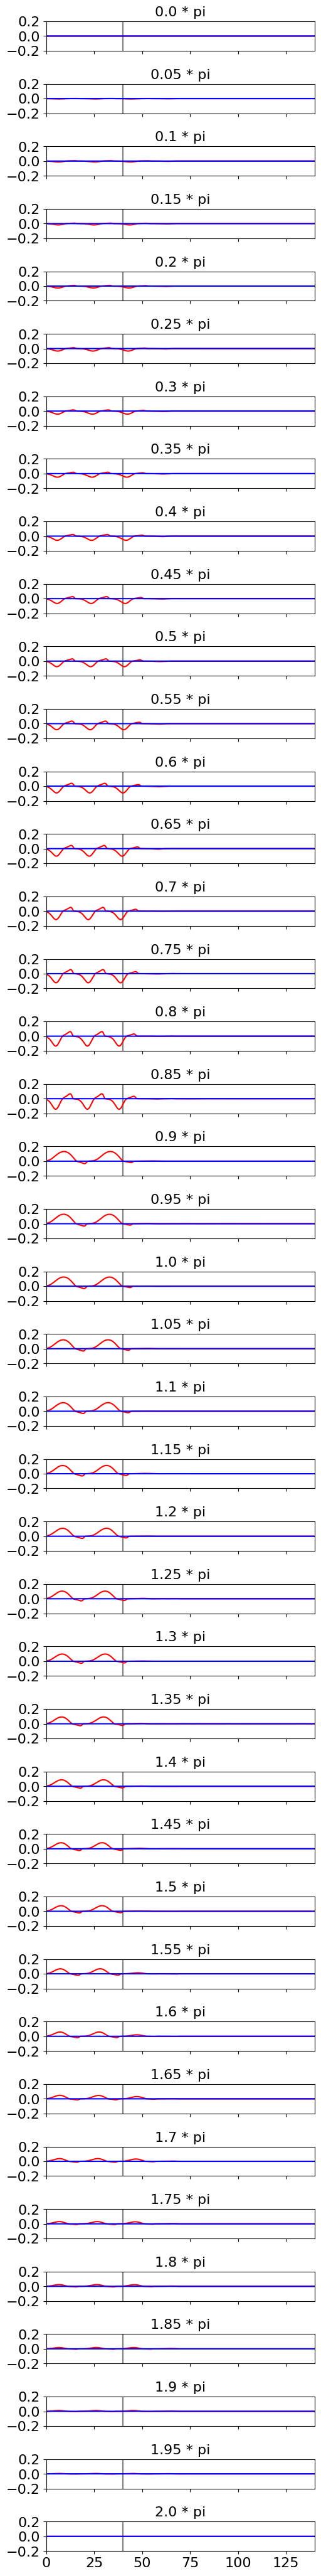

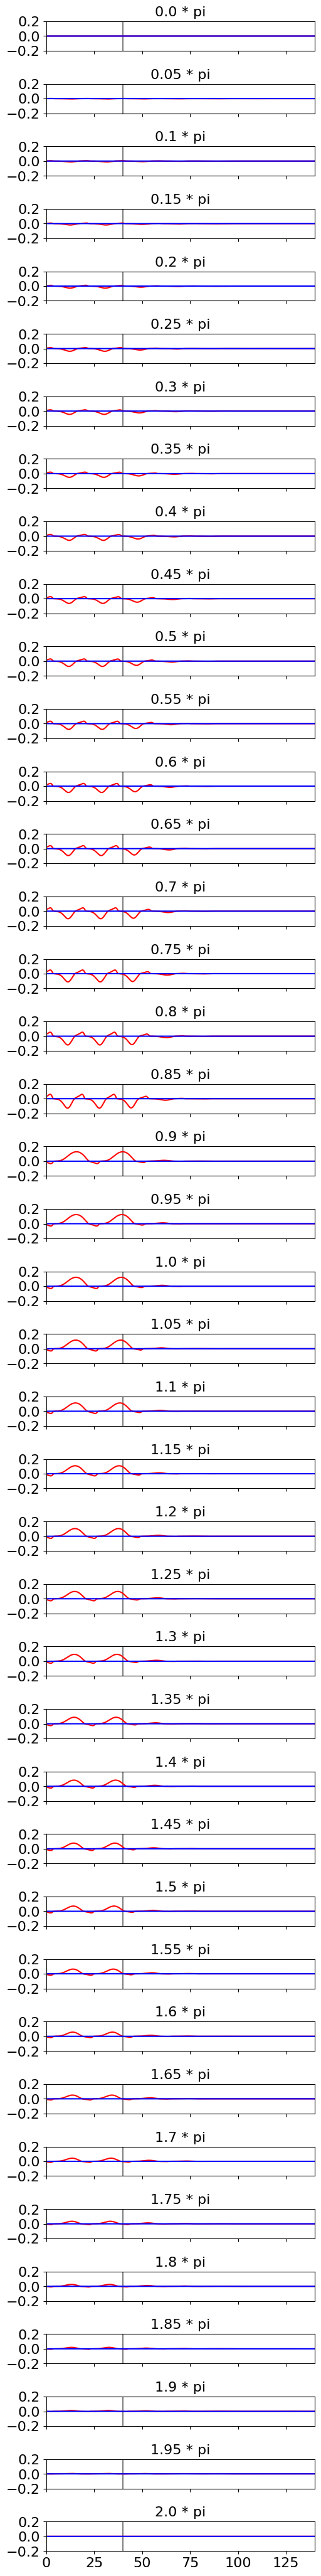

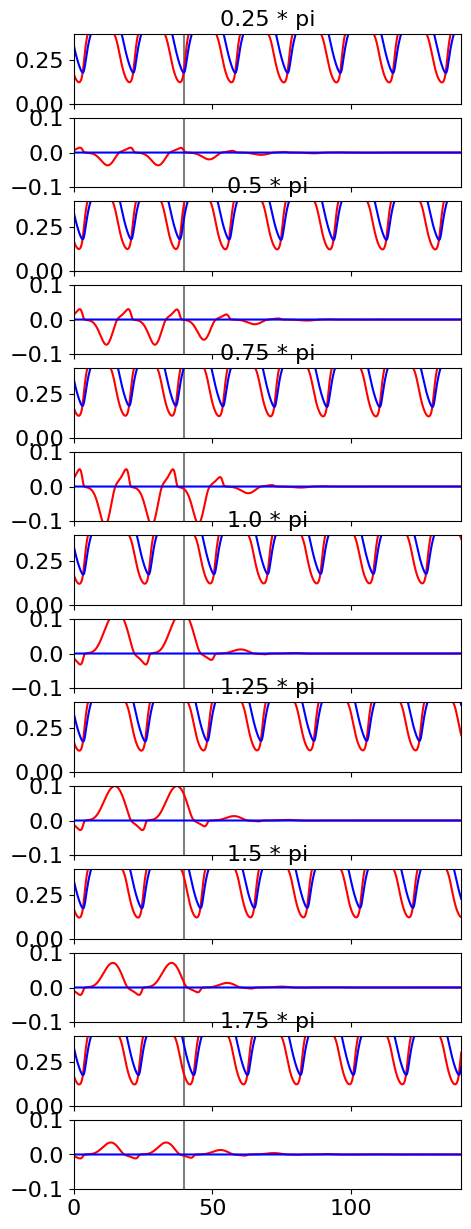

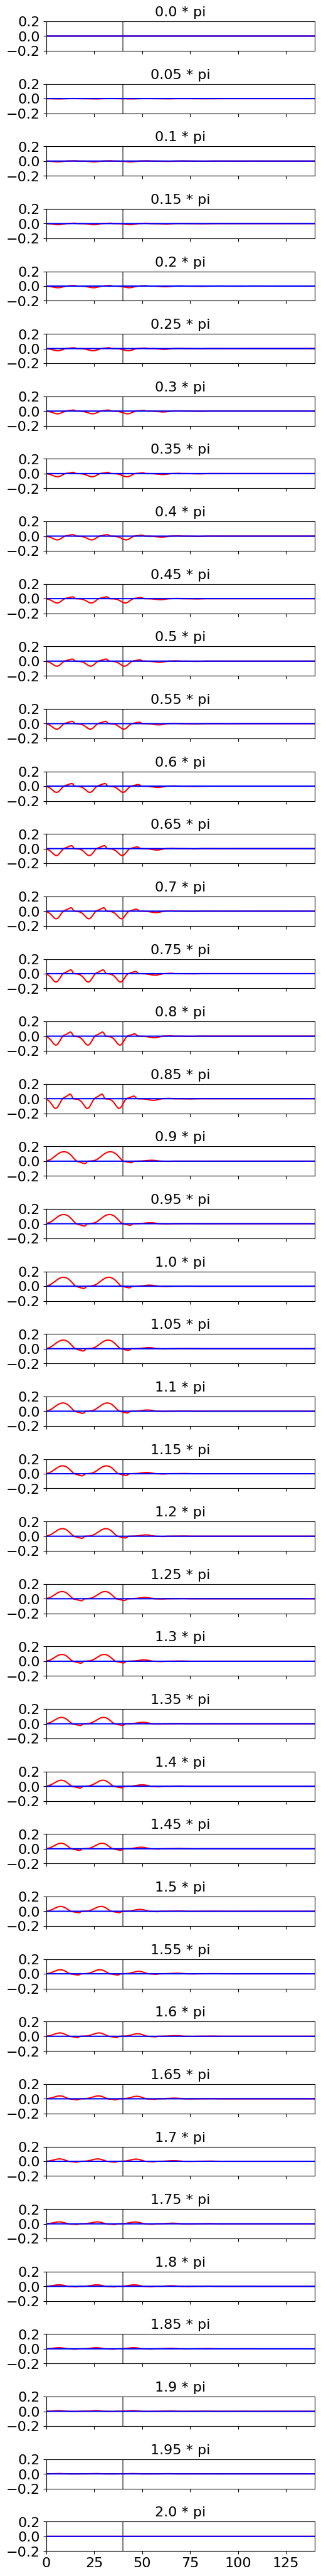

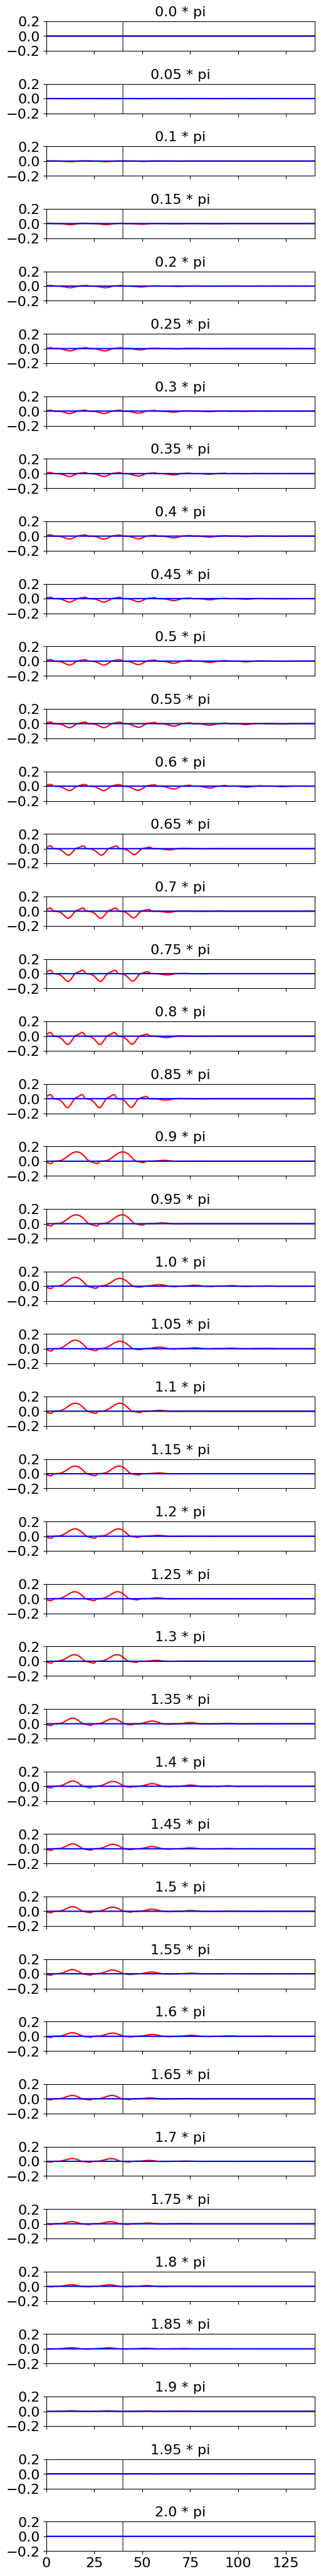

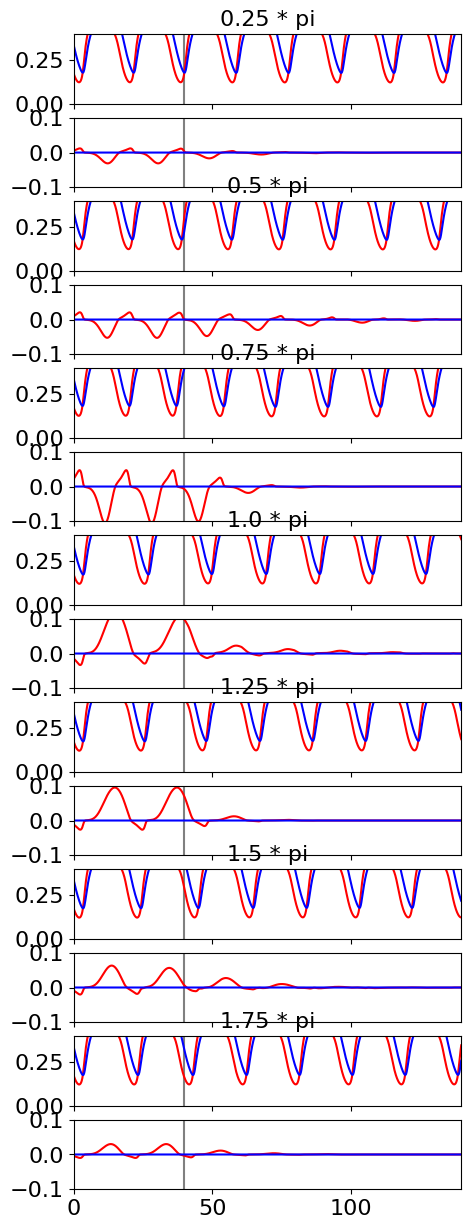

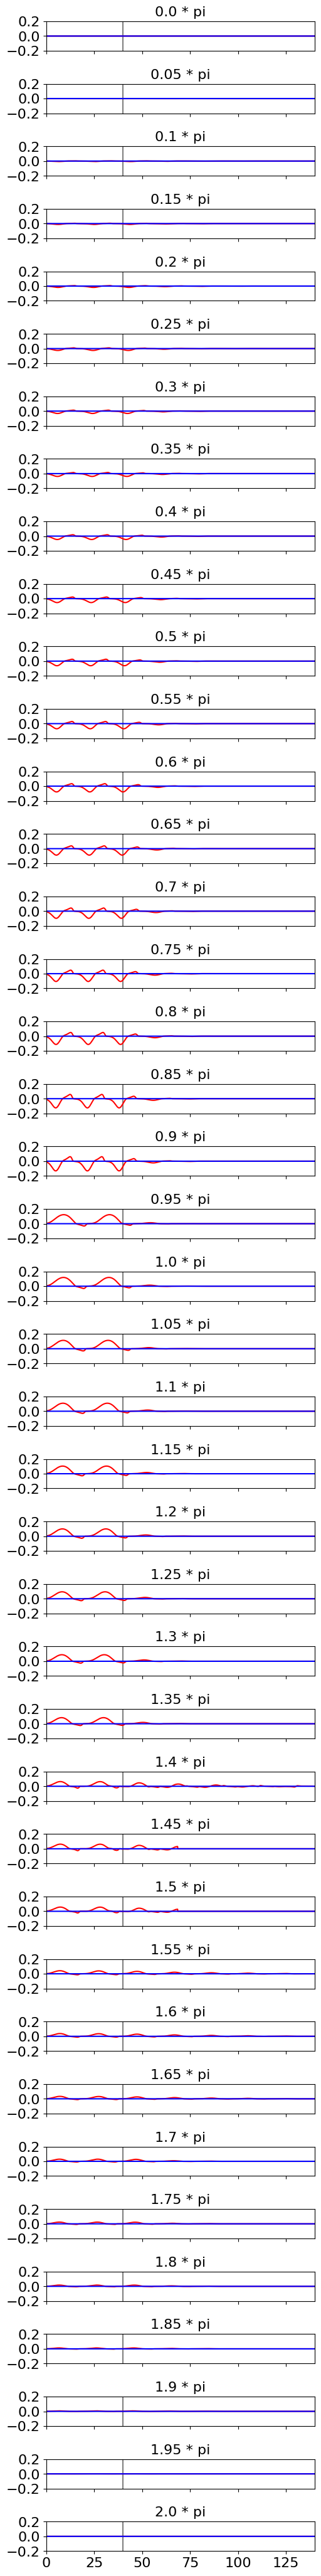

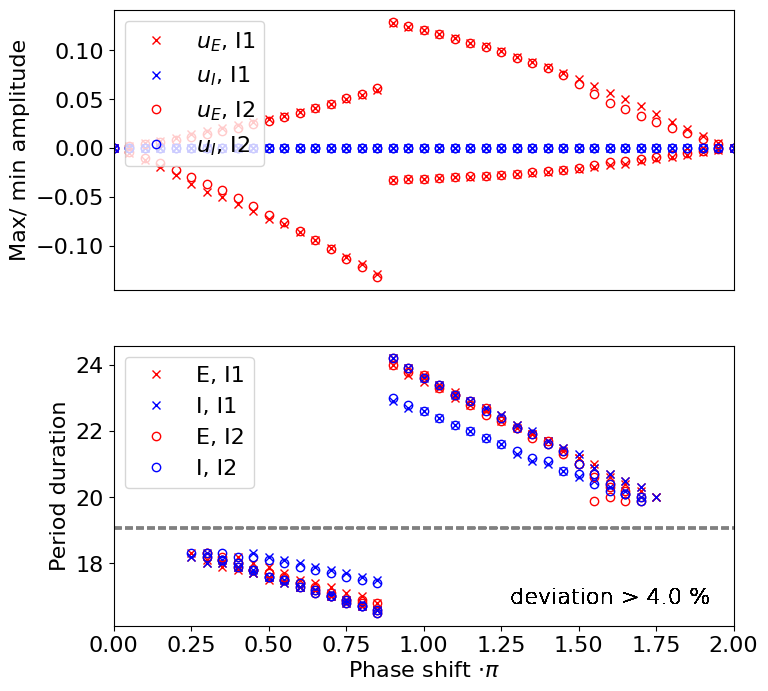

In [21]:
duration = 140.
dt=0.1

filehandler = open("results_min_w1.pickle","rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open("results_peak_w1.pickle","rb")
results_peak_w1 = pickle.load(filehandler)
filehandler.close()

for i_w in range(len(results_min_w1["w1"])):
    ops_plotall(results_min_w1["control"][i_w], 0.2, duration, dt, 40., results_min_w1["filename"][i_w], savepath)
    ops_plotsubset(results_min_w1["state"][i_w], results_min_w1["control"][i_w], 0.4, 0.1, duration, dt, 40., 
                results_min_w1["filename"][i_w], savepath_subset)
    ops_plotall(results_peak_w1["control"][i_w], 0.2, duration, dt, 40., results_peak_w1["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w1, results_peak_w1, period, 0.04, dt, "plot1", savepath)
ops_plot_timing_inits(results_min_w1, results_peak_w1, dt, [0,60], 20., "plot2", savepath)

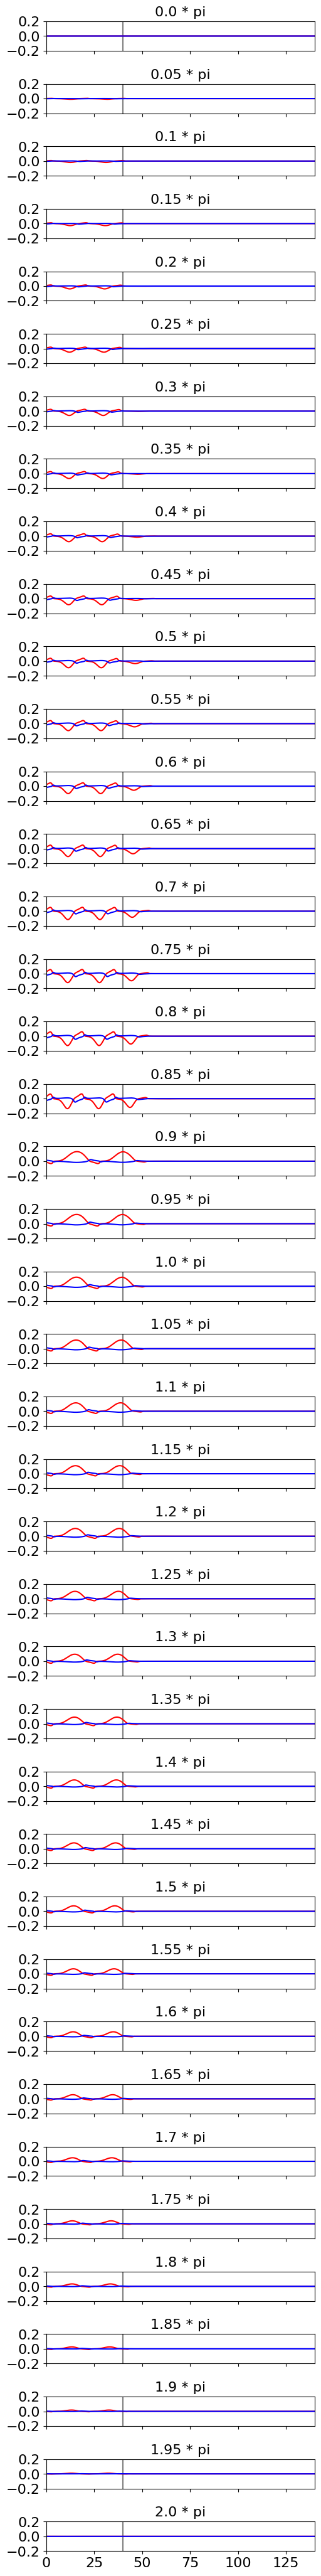

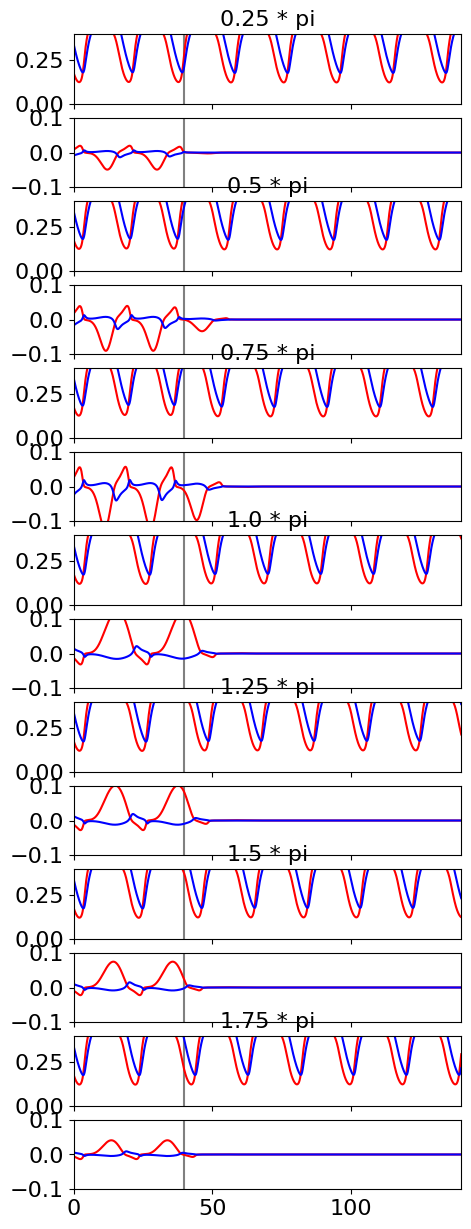

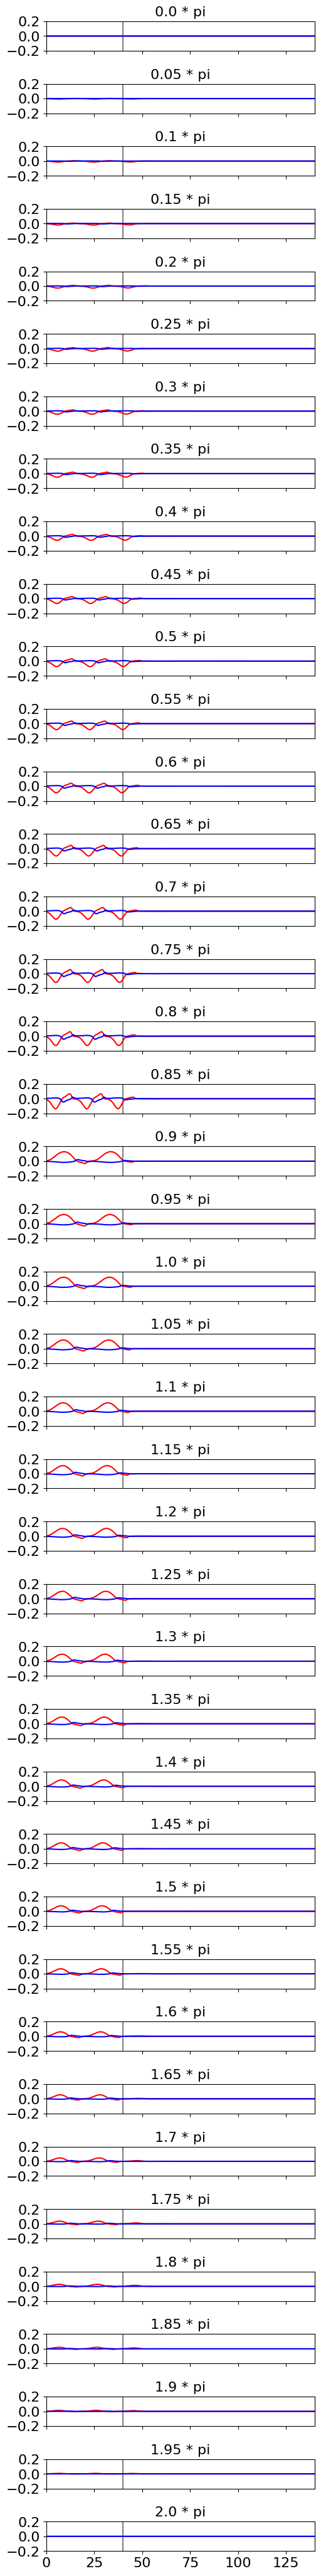

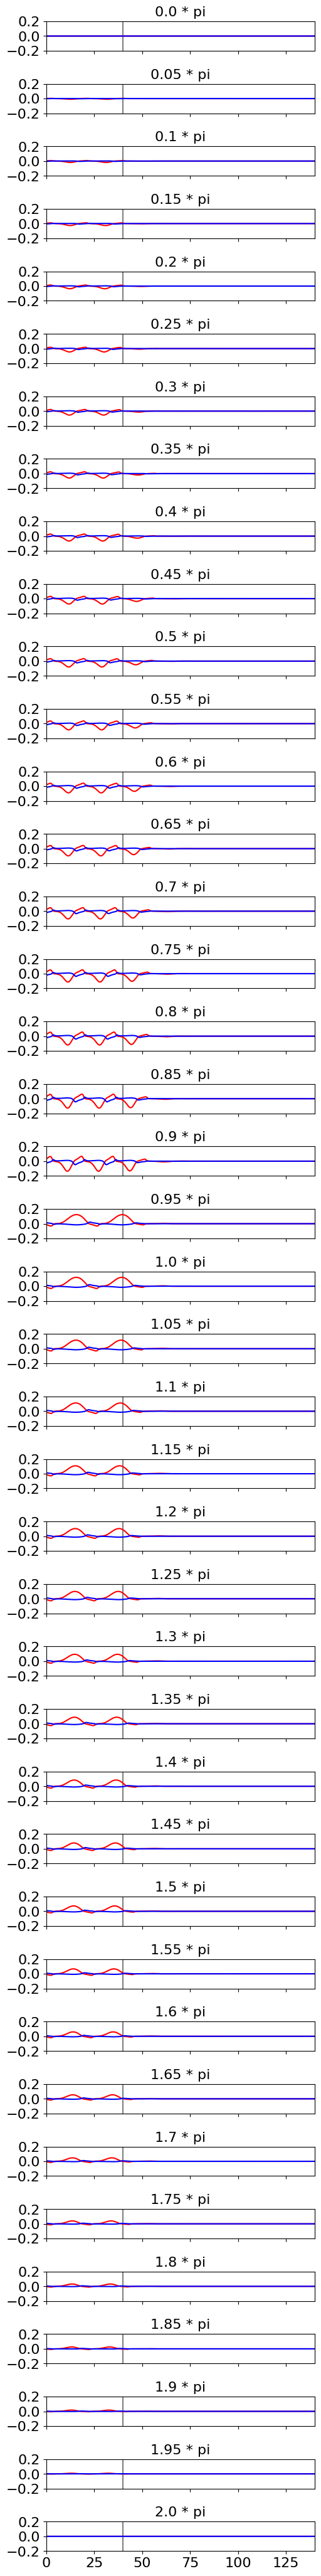

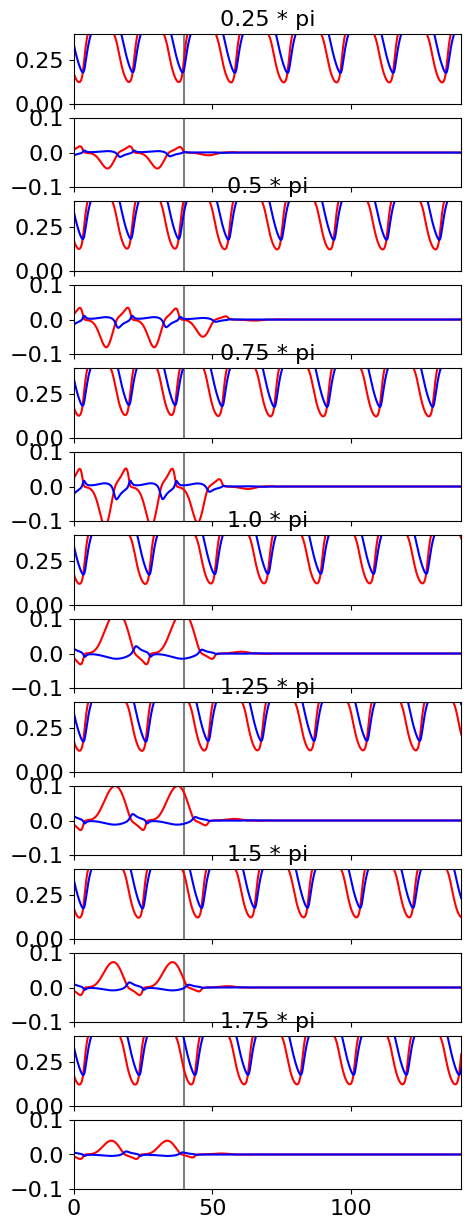

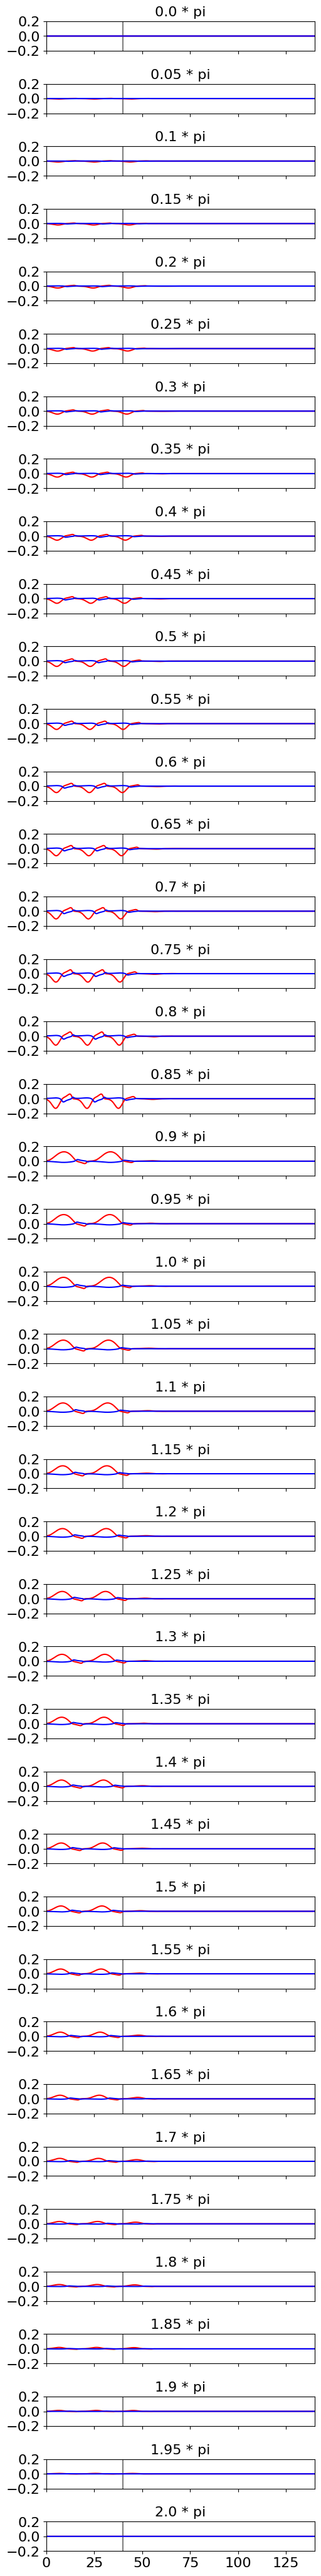

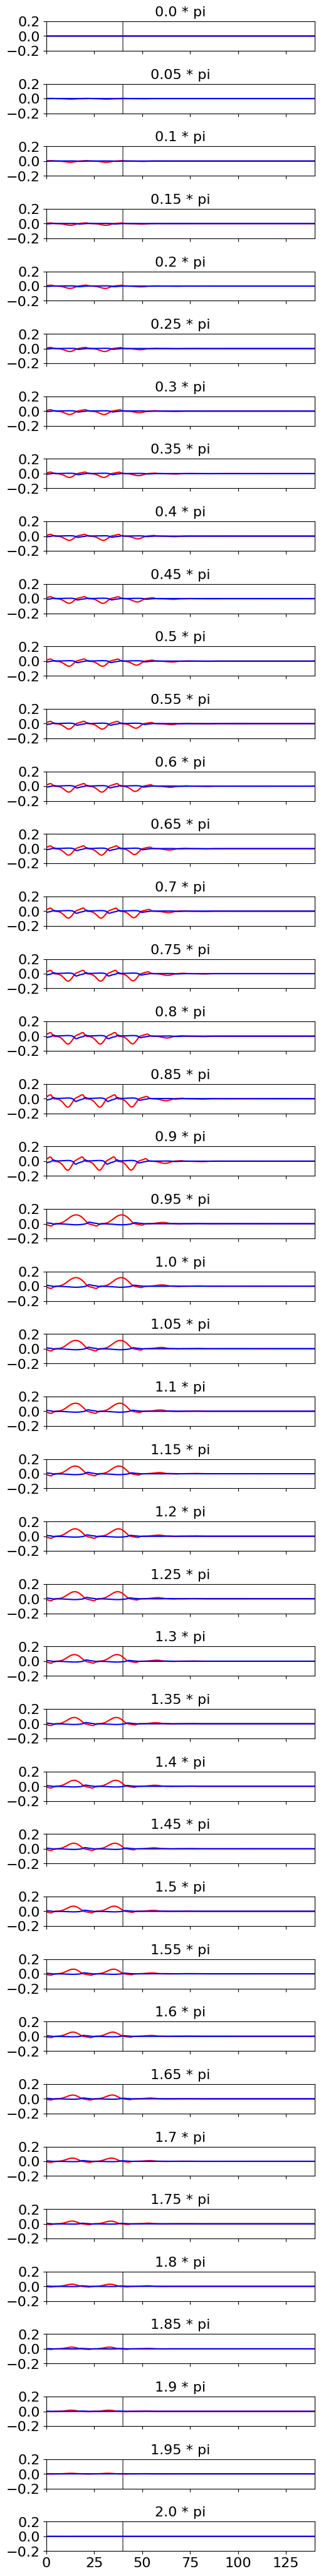

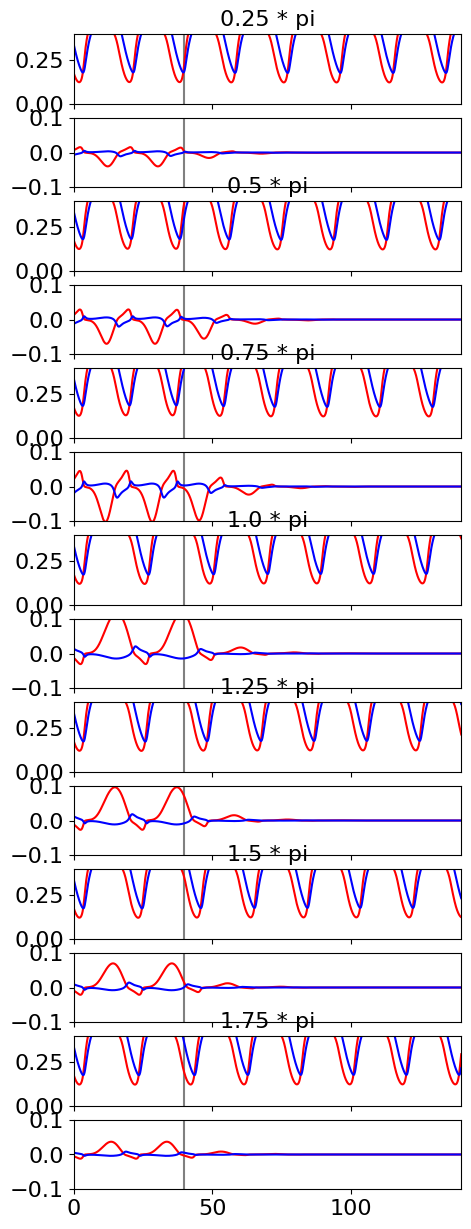

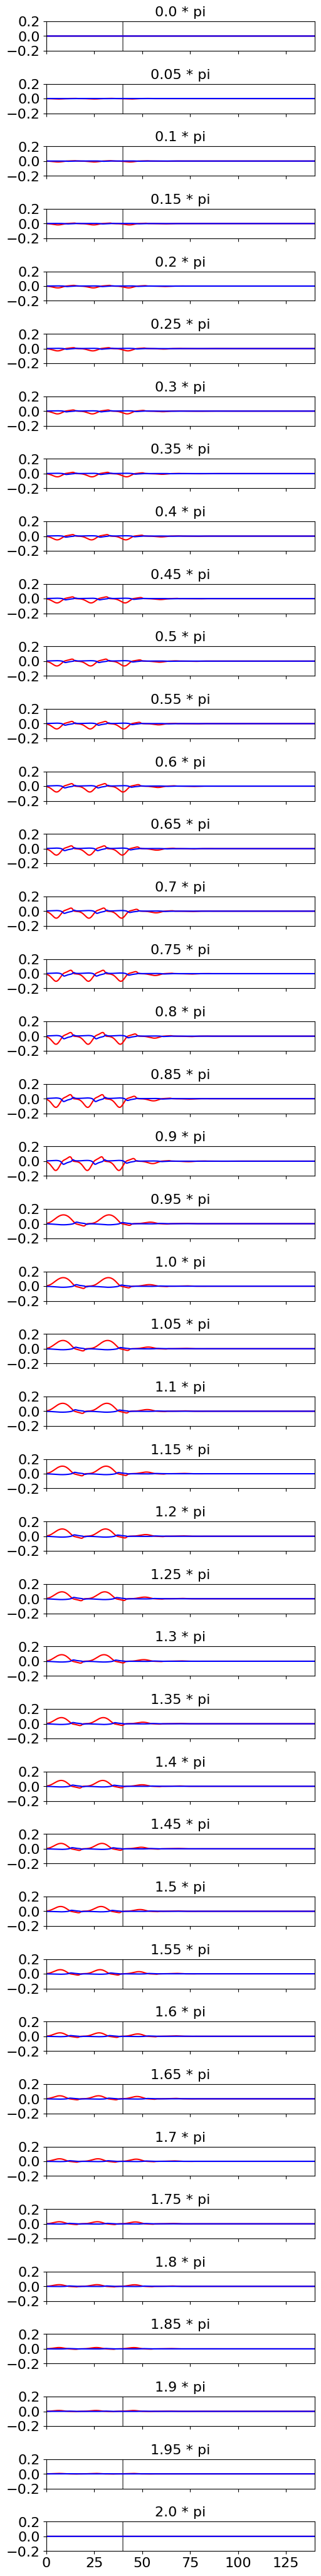

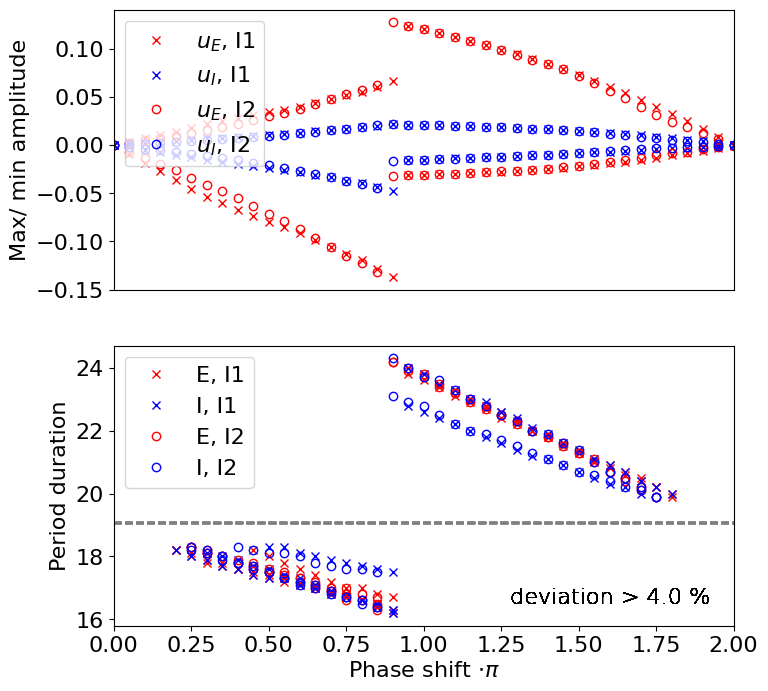

In [26]:
duration = 140.
dt=0.1

filehandler = open("results_min_w2.pickle","rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

filehandler = open("results_peak_w2.pickle","rb")
results_peak_w2 = pickle.load(filehandler)
filehandler.close()

for i_w in range(len(results_min_w2["w2"])):
    ops_plotall(results_min_w2["control"][i_w], 0.2, duration, dt, 40., results_min_w2["filename"][i_w], savepath)
    ops_plotsubset(results_min_w2["state"][i_w], results_min_w2["control"][i_w], 0.4, 0.1, duration, dt, 40., 
                results_min_w2["filename"][i_w], savepath_subset)
    ops_plotall(results_peak_w2["control"][i_w], 0.2, duration, dt, 40., results_peak_w2["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w2, results_peak_w2, period, 0.04, dt, "plot1_w2", savepath)
ops_plot_timing_inits_L2(results_min_w2, results_peak_w2, dt, [0,60], 20., "plot2_w2", savepath)

In [14]:
wc = WCModel()
dist_array = [100.]

ep, em, ip, im, epim, emip, period = get_prc(wc, [2.5, 0.], dist_array)

In [15]:
dt = 0.01

for i in range(len(dist_array)):
    min0, min1 = np.amin(np.abs(ep[i,:1000])), np.amin(np.abs(ep[i,1000:]))
    i0 = np.where(min0 == ep[i,:1000])
    i1 = np.where(min1 == ep[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("E+")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f"% ((i00 +2+ i11)/2, i00+2.-i11))

    min0, min1 = np.amin(np.abs(em[i,:1000])), np.amin(np.abs(em[i,1000:]))
    i0 = np.where(min0 == em[i,:1000])
    i1 = np.where(min1 == em[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("E-")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f" % ((i00 +2+ i11)/2, i00+2.-i11))
    print("----------------------------------------")

    min0, min1 = np.amin(np.abs(ip[i,:1000])), np.amin(np.abs(ip[i,1000:]))
    i0 = np.where(min0 == ip[i,:1000])
    i1 = np.where(min1 == ip[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("I+")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f"% ((i00 +2+ i11)/2, i00+2.-i11))

    min0, min1 = np.amin(np.abs(im[i,:1000])), np.amin(np.abs(im[i,1000:]))
    i0 = np.where(min0 == im[i,:1000])
    i1 = np.where(min1 == im[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("I-")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f" % ((i00 +2+ i11)/2, i00+2.-i11))
    print("----------------------------------------")

E+
advance : 1.2022, 0.5119
delay : 2.3296, 1.1886
E-
advance : 1.2415, 0.5692
delay : 2.2139, 1.2651
----------------------------------------
I+
advance : 1.1209, 0.6000
delay : 1.9999, 0.0003
I-
advance : 0.9494, 0.2421
delay : 2.1151, 1.3373
----------------------------------------


advance E+ max =  [1.21173503]
delay E+ max =  [0.51081906]
advance E- max =  [0.30691624]
delay E- max =  [1.3561662]
advance I+ max =  []
delay I+ max =  [1.1819992]
advance I- max =  [0.94942254]
delay I- max =  [0.28461436]


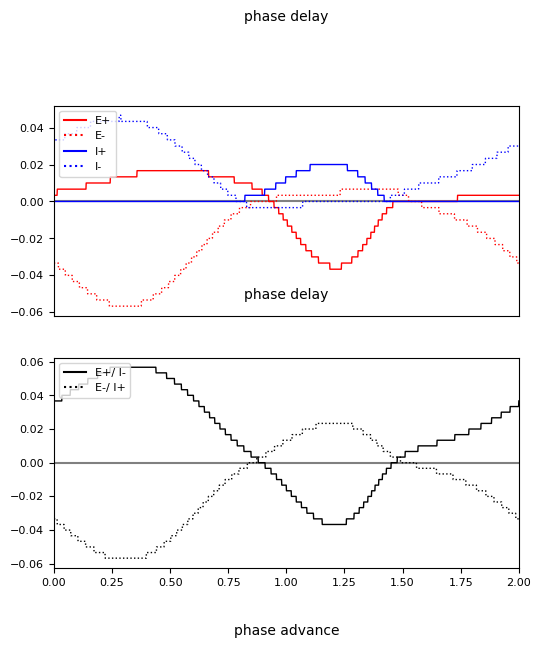

In [16]:
dt= 0.01

min0 = scipy.signal.find_peaks(-ep[0])[0]
print("advance E+ max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(10. * ep[0])[0]
print("delay E+ max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-em[0])[0]
print("advance E- max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(em[0])[0]
print("delay E- max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-ip[0])[0]
print("advance I+ max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(ip[0])[0]
print("delay I+ max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-im[0])[0]
print("advance I- max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(im[0])[0]
print("delay I- max = ", 2.*min0*dt/period)

plot_pcr(ep, em, ip, im, epim, emip, dist_array, period, "prc.png", savepath)